In [ ]:
dask_kaggle_bag

In [5]:
import dask.bag as db
# import dask.dataframe as dd
import numpy as np

In [6]:
lst = []
for i in range(5):
    # randint(low, high=None, size=None, dtype='l')  
    lst.append({f"Name.{name}": value for name, value in np.random.randint(1, 10, (5, 2))}) 
    lst.append(np.random.randint(2, 5, (2, 4)))
    lst.append(np.random.randint(1, 1000, (1,)))
    lst.append([i for i in range(100, 200, 10)])
  
b = db.from_sequence(lst)


({'Name.2': 3, 'Name.7': 8, 'Name.4': 6, 'Name.8': 1, 'Name.5': 3},)

In [7]:
b.take(3)

({'Name.2': 3, 'Name.7': 8, 'Name.4': 6, 'Name.8': 1, 'Name.5': 3},)

In [8]:
b.take(2)

({'Name.2': 3, 'Name.7': 8, 'Name.4': 6, 'Name.8': 1, 'Name.5': 3},)

In [9]:
def fil(el):
    if type(el)!=dict and type(el)!=list: return True
    else: return False

filmap = b.filter(fil).map(lambda x: x**2)

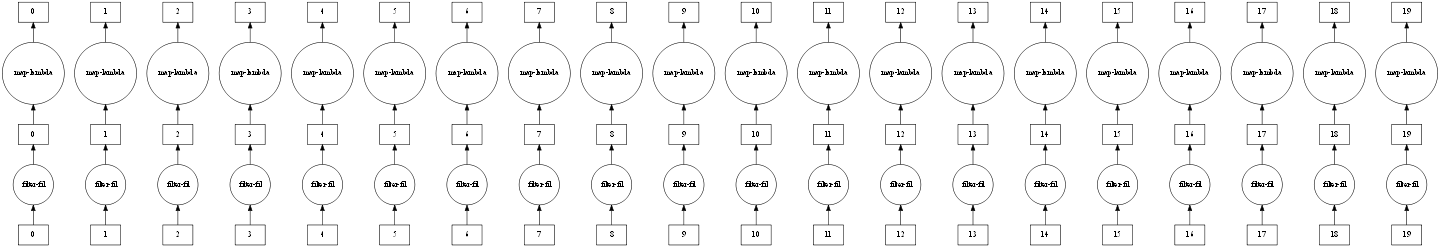

In [10]:
filmap.visualize(size="15,10!")


In [11]:
filmap.compute()


[array([[ 9, 16, 16, 16],
        [ 4,  4,  9,  4]]), array([614656]), array([[16, 16,  9,  4],
        [16,  9,  9,  4]]), array([870489]), array([[ 4,  9, 16, 16],
        [ 4,  4,  9,  4]]), array([203401]), array([[ 9, 16,  4,  9],
        [ 4,  9, 16,  4]]), array([19881]), array([[9, 9, 4, 4],
        [4, 4, 9, 9]]), array([40000])]

In [12]:
comp = filmap.flatten().mean()

In [13]:
comp

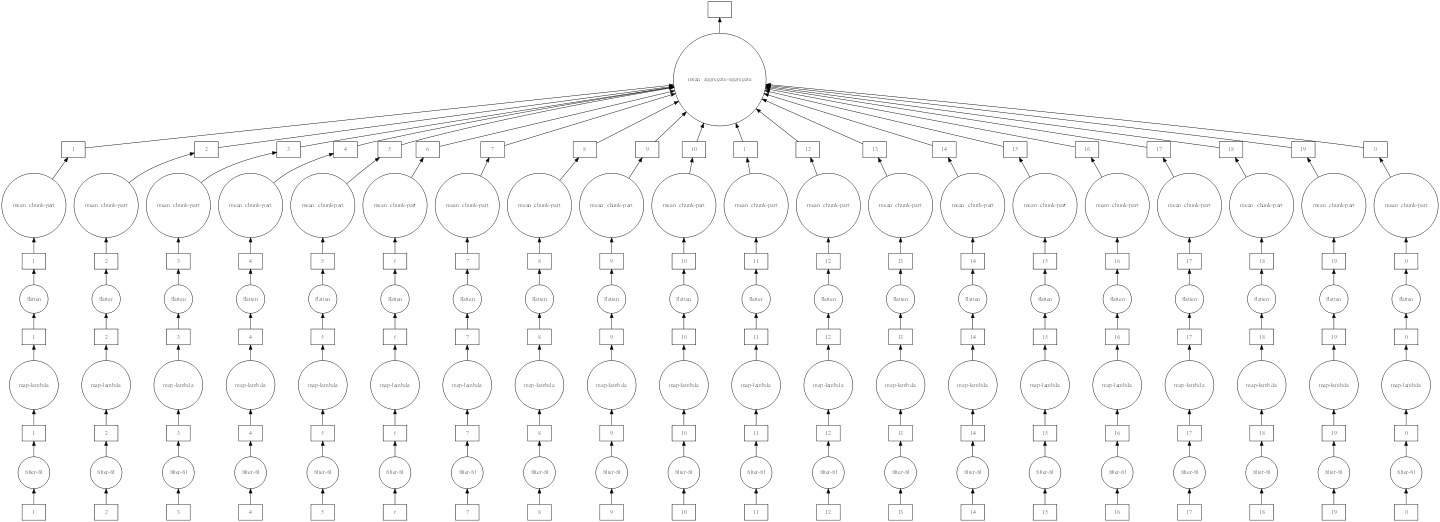

In [14]:
comp.visualize(size="15, 15!")

In [15]:
comp.compute()

array([116567.06666667, 116568.2       , 116568.53333333, 116566.73333333])

In [16]:
comp

In [18]:
print(comp.compute())

[116567.06666667 116568.2        116568.53333333 116566.73333333]


# simple example

In [23]:
def iseven(x):
    return x % 2 == 0

In [22]:
iseven(2), iseven(1)

(True, False)

In [24]:
import dask.bag as db
b = db.from_sequence(range(5))

In [25]:
b

dask.bag<from_se..., npartitions=5>

In [28]:
b.compute()

[0, 1, 2, 3, 4]

In [29]:
list(b.filter(iseven))   

[0, 2, 4]